In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.Load the dataset into python environment

In [5]:
df=pd.read_csv(r"/content/titanic_dataset.csv")

### 2. Make ‘PassengerId’ as the index column

In [6]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3.Check the basic details of the dataset

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

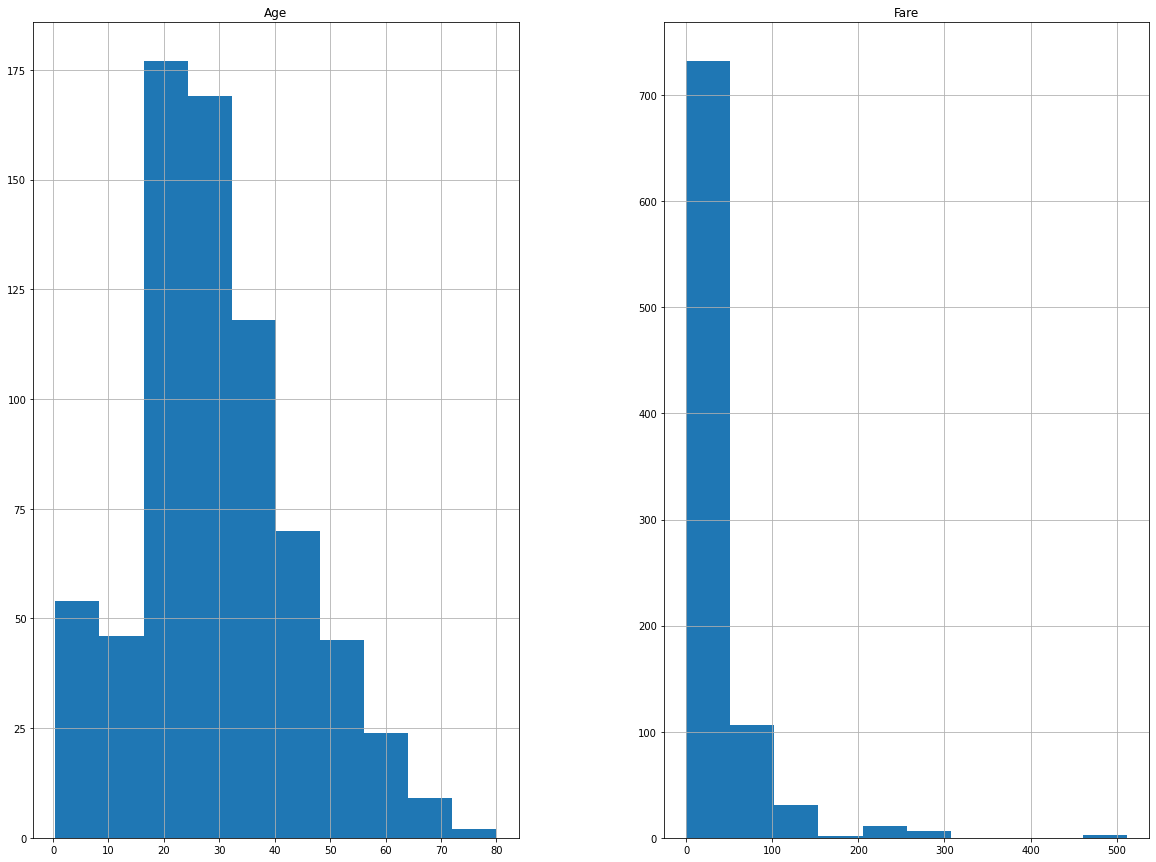

In [11]:
skew = df.select_dtypes(include=['float'])
skew.hist(figsize=(20,15))
plt.show()

Since the data of age is symmetric skewed , we will replace the values with its mean.

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [14]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])


In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

The missing values have been added

### 5. Check and handle outliers in at least 3 columns in the dataset

#### Outliers in Age column

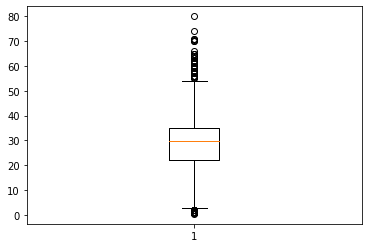

In [16]:
#boxplot of 'Age'
plt.boxplot(df['Age'])
plt.show()

In [17]:
#calculating percentiles
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

Q1 =  22.0 
Q2 =  29.7 
Q3 =  35.0


In [18]:
#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',IQR)

IQR =  13.0


In [19]:
#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

Upper limit =  54.5 
Lower limit =  2.5


In [20]:
#creating a list of outliers
outlier=[]
for x in df['Age']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [21]:
#finding index values of outliers
df.loc[(df['Age']>up_lim ) | (df['Age']<low_lim)].index

Int64Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],
           dtype='int64')

In [22]:
#removing the outliers
df.drop([ 8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],inplace=True)

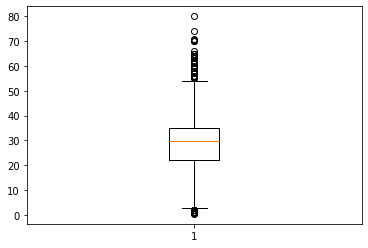

In [23]:
#boxplot of 'Age'
plt.boxplot(df['Age'])
plt.show()

#### Removing outliers in 'SibSp' column

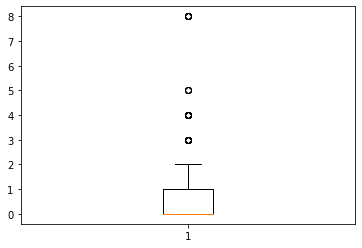

In [24]:
#boxplot of 'SibSp'
plt.boxplot(df['SibSp'])
plt.show()

In [25]:
#calculating percentiles
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

Q1 =  0.0 
Q2 =  0.0 
Q3 =  1.0


In [26]:
#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',IQR)

IQR =  1.0


In [27]:
#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

Upper limit =  2.5 
Lower limit =  -1.5


In [28]:
#creating a list of outliers
outlier=[]
for x in df['SibSp']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
outlier

[3,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [29]:
#finding index values of outliers
ind1=df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([  7,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159, 164,
            176, 180, 182, 201, 229, 261, 266, 278, 324, 374, 386, 409, 485,
            541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824, 846,
            850, 863],
           dtype='int64')

In [30]:
#removing the outliers
df.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

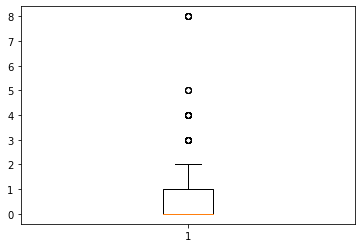

In [31]:
#boxplot of 'SibSp'
plt.boxplot(df['SibSp'])
plt.show()

### Removing outliers in 'Fare' column

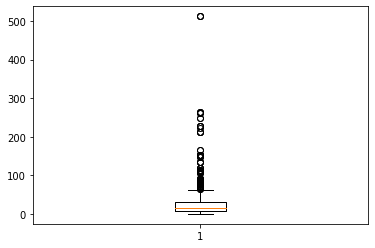

In [32]:
#boxplot of 'Fare'
plt.boxplot(df['Fare'])
plt.show()

In [33]:
#calculating percentiles
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

Q1 =  7.9104 
Q2 =  14.45 
Q3 =  30.5


In [34]:
#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',IQR)

IQR =  22.5896


In [35]:
#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',round(low_lim,2))

Upper limit =  64.3844 
Lower limit =  -25.97


In [36]:
#creating a list of outliers
outlier=[]
for x in df['Fare']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 76.7292,
 80.0,
 83.475,
 263.0,
 77.2875,
 247.5208,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 90.0,
 79.2,
 86.5,
 512.3292,
 153.4625,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 69.3,
 73.5,
 113.275,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 69.55,
 120.0,
 80.0,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55,
 83.1583]

In [37]:
#finding index values of outliers
ind1=df['Fare']>up_lim
df.loc[ind1].index

Int64Index([  1,  27,  31,  52,  61,  62,  88, 102, 118, 124,
            ...
            779, 792, 802, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=101)

In [38]:
df.drop([2, 32, 35, 53, 62, 63, 73, 93, 98, 103, 119, 121, 125, 140, 152, 156, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


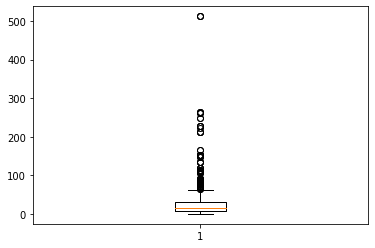

In [39]:
#boxplot of 'Fare'
plt.boxplot(df['Fare'])
plt.show()

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target).

In [40]:
#The dependent variable is stored in y
y=df['Survived']
#The independent variable is stored in x
#The categorical variables name,ticket and cabin are dropped from the model.
x=df.drop(['Survived','Name','Ticket','Cabin'],axis=1) 

In [41]:
#One hot encoding on the categorical variables 'Sex' and 'Embarked'
x=pd.get_dummies(x)
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0


In [42]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [43]:
#Linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model1=lr.fit(x_train,y_train)
predictions1=model1.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(predictions1,y_test)
print('Mean of squared errors of the linear regression model is ',round(MSE1,3))

Mean of squared errors of the linear regression model is  0.138


In [45]:
from sklearn.metrics import r2_score
lr_r2=r2_score(predictions1,y_test)
print('R2 value of the linear regression model is ',round(lr_r2,3))

R2 value of the linear regression model is  -0.452


In [46]:
#min max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler()
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.505023,0.653944,0.368431,0.064408,0.063189,0.062958,0.358779,0.641221,0.184478,0.086514,0.729008
std,0.286965,0.418327,0.162464,0.139117,0.133945,0.099559,0.479947,0.479947,0.388121,0.281301,0.444755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259831,0.500000,0.271174,0.000000,0.000000,0.015426,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.503933,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.752528,1.000000,0.434531,0.125000,0.000000,0.059532,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
#Linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model1=lr.fit(x_train,y_train)
predictions1=model1.predict(x_test)
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(predictions1,y_test)
print('Mean of squared errors of the linear regression model is ',round(MSE1,3))

Mean of squared errors of the linear regression model is  0.146


Min-Max scaling has been performed